<a href="https://colab.research.google.com/github/ichiyan/English-Character-Recognition/blob/master/letter_recognition_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANN from scratch**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Preparing Data
  - from https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format?select=A_Z+Handwritten+Data.csv

In [ ]:
data = pd.read_csv('gdrive/My Drive/coding_projects/letter_recognition/kaggle/A_Z Handwritten Data.csv')
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# only getting data for letters A-E
# gets 1000 samples and shuffles them
adf = data.iloc[:1000].sample(frac = 1)
bdf = data.iloc[13870:14870].sample(frac = 1)
cdf = data.iloc[22538:23538].sample(frac = 1)
ddf = data.iloc[45947:46947].sample(frac = 1)
edf = data.iloc[56081:57081].sample(frac = 1)

# 80% train 10% test
adf_train = adf.iloc[:800]
adf_test = adf.iloc[800:]
bdf_train = bdf.iloc[:800]
bdf_test = bdf.iloc[800:]
cdf_train = cdf.iloc[:800]
cdf_test = cdf.iloc[800:]
ddf_train = ddf.iloc[:800]
ddf_test = ddf.iloc[800:]
edf_train = edf.iloc[:800]
edf_test = edf.iloc[800:]

trainDF = pd.concat([adf_train, bdf_train, cdf_train, ddf_train, edf_train], ignore_index = True)
testDF = pd.concat([adf_test, bdf_test, cdf_test, ddf_test, edf_test], ignore_index = True)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = trainDF.to_numpy()
m, n = train_data.shape
np.random.shuffle(train_data)

# transpose so that col names (first row) are the labels
# cols are the samples
train_data = train_data.T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

test_data = testDF.to_numpy()
np.random.shuffle(test_data)

test_data = test_data.T
Y_test = test_data[0]
X_test = test_data[1:n]
X_test = X_test / 255.

In [ ]:
# input layer - 784 units (as there are 784 px)
# hidden layer - 5 units
# output layer - 5 units (0-5/A-E)

def init_params():
    # W1 = np.random.rand(5, 784) - 0.5
    # b1 = np.random.rand(5, 1) - 0.5
    # W2 = np.random.rand(5, 5) - 0.5
    # b2 = np.random.rand(5, 1) - 0.5

    W1 = np.random.normal(size=(5, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(5, 1)) * np.sqrt(1./5)
    W2 = np.random.normal(size=(5, 5)) * np.sqrt(1./10)
    b2 = np.random.normal(size=(5, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2


def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 2 2 ... 2 2 2] [0 4 3 ... 2 0 2]
0.232
Iteration:  10
[2 3 3 ... 2 2 2] [0 4 3 ... 2 0 2]
0.36525
Iteration:  20
[0 3 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.62525
Iteration:  30
[0 3 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.73025
Iteration:  40
[0 3 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.84725
Iteration:  50
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.876
Iteration:  60
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.893
Iteration:  70
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.903
Iteration:  80
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.9105
Iteration:  90
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.9155
Iteration:  100
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.92
Iteration:  110
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.9245
Iteration:  120
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.92625
Iteration:  130
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.9295
Iteration:  140
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.92925
Iteration:  150
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.931
Iteration:  160
[0 4 3 ... 2 0 2] [0 4 3 ... 2 0 2]
0.93175
Iteratio

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


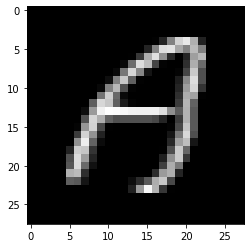

Prediction:  [4]
Label:  4


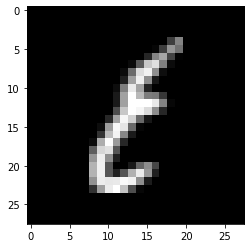

Prediction:  [3]
Label:  3


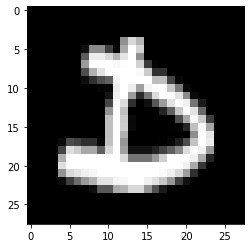

Prediction:  [3]
Label:  3


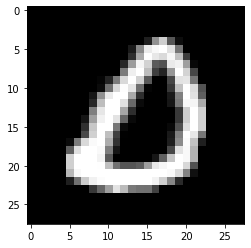

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[3 2 3 0 3 3 2 4 2 1 1 1 1 0 0 2 1 2 0 3 1 4 4 3 4 0 0 1 1 3 3 2 4 3 2 2 2
 3 0 0 2 0 4 3 1 0 1 3 3 1 2 0 2 3 4 0 2 1 2 4 2 3 1 1 3 4 2 2 4 0 4 2 0 2
 3 0 4 0 1 2 1 0 1 2 0 0 0 0 2 4 4 1 0 3 2 3 1 1 2 3 2 2 1 0 3 1 3 0 2 1 3
 2 0 4 0 2 3 1 0 2 0 1 4 4 3 3 3 2 1 1 2 3 3 1 4 2 2 0 0 4 4 4 0 4 4 0 2 0
 3 0 0 1 0 3 1 1 2 3 3 4 0 2 4 4 4 4 4 4 3 0 1 0 4 0 0 4 0 2 3 2 4 4 4 2 4
 1 2 1 2 2 1 3 4 4 4 0 1 4 0 3 1 3 0 2 1 2 0 3 0 0 1 1 3 1 2 0 4 3 4 4 3 1
 1 3 2 2 0 2 3 0 2 2 4 2 2 0 0 1 0 2 0 4 0 2 1 2 0 1 0 4 3 2 3 1 2 4 3 2 4
 3 0 0 4 1 0 0 0 1 4 0 4 2 3 1 1 2 3 1 4 0 4 2 0 4 1 2 0 0 2 0 3 4 2 0 1 1
 2 0 1 3 3 3 4 3 4 0 4 4 3 1 0 2 2 1 1 1 0 3 2 1 4 2 3 3 4 0 2 3 2 4 4 1 3
 1 3 3 4 0 4 0 4 2 1 0 0 1 1 2 4 4 1 2 3 3 4 1 3 1 4 0 1 3 1 0 0 0 3 3 0 0
 0 3 3 0 0 2 3 4 0 3 0 4 3 1 0 3 2 2 2 0 0 4 3 0 1 4 1 0 2 0 3 4 3 4 1 1 1
 1 3 0 0 3 4 3 3 2 1 0 3 2 2 4 3 1 0 2 0 4 4 2 2 0 2 0 3 3 4 4 2 3 4 3 1 4
 1 0 1 4 4 2 4 3 0 3 0 4 4 4 3 1 2 0 4 1 3 0 1 2 2 1 4 3 2 0 4 2 3 0 4 0 3
 1 2 2 2 3 4 0 4 2 2 3 2 

0.932